# 1) Sampling (warm up)
## Sampling algorithm

In [1]:
import random
import sys
import os

activities_distr = {'movies':0.2,
                     '551':0.4,
                     'playing':0.1,
                     'studying':0.3}



def sampling(days):
    activities_stats = {'movies':0,
                     '551':0,
                     'playing':0,
                     'studying':0}
    i = 0
    activity_selector = random.uniform(0,1)
    while(i < days):
        if ( 0 <= activity_selector < 0.2):
            activities_stats['movies'] += 1
        elif (0.2 <= activity_selector < 0.6):
            activities_stats['551'] += 1
        elif (0.6 <= activity_selector < 0.7):
            activities_stats['playing'] += 1
        else:
            activities_stats['studying'] += 1
        
        activity_selector = random.uniform(0,1)
        i += 1
    activities_report = {}
    for a,step in activities_stats.items():
        activities_report[a] = float(step)/days
        
    print ("Proportion for", days, "days:",activities_report)

sampling(100)
sampling(1000)

Proportion for 100 days: {'movies': 0.18, '551': 0.45, 'playing': 0.1, 'studying': 0.27}
Proportion for 1000 days: {'movies': 0.212, '551': 0.385, 'playing': 0.106, 'studying': 0.297}


# 2) Model selection

In [2]:
import os
import csv
import math
import numpy as np
from numpy import matrix, polyfit
from numpy.linalg import inv
import matplotlib.pyplot as plt

'''function getData sorts the data and returns 2 (sorted) lists x's and y's '''
def getData(path_string):
    with open(path_string, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
        tuples = []
        for i in range(0,len(data)):
            tuples.append((float(data[i][0]),float(data[i][1])))
        sorted_tuples = sorted(tuples,key=lambda tup:tup[0])
        
        x_data = []
        y_data = []
        for i in range(0,len(data)):
            x_data.append(sorted_tuples[i][0])
            y_data.append(sorted_tuples[i][1])
    return {'x':x_data,'y':y_data}

'''
function makeXMatrix build the x matrix based on w1 (degree)
ex: if w1=3 then 
x = 
[
[2 2^2 2^3]
[3 3^2 3^3]
[4 4^2 4^3] 
]     
'''
def makeXMatrix(data_list_x,w1):
    x_matrix = []
    for j in range(0,len(data_list_x)):
        x_matrix.append([])
        for i in range(0,w1):
            x_matrix[j].append(math.pow(data_list_x[j],i+1))
    return x_matrix
    
def compute_mse(y_predict_list,y_data_list):
    sumSquare = 0
    for i in range(0,len(train_data.get('x'))):
        sumSquare += math.pow(y_data_list[i]- y_predict_list[i],2)
    mse= sumSquare/len(y_data_list)
    return mse



## Compute training and validation MSE

In [3]:
'''Load data set'''
train_data = getData("Dataset_1_train.csv")

'''Sample size n '''
n = len(train_data.get('x'))

'''Split train data x's and y's into 2 lists'''
x_train_data = train_data.get('x')
y_train_data = train_data.get('y')

#print(x_train_data)
'''Degree w1'''
w1 = 20
'''convert list to numpy matrix'''
x_train = np.array(makeXMatrix(x_train_data, w1))
y_train = np.array(y_train_data).reshape(n,1)
#print y_train

'''transpose x (x^T) '''
x_train_t = x_train.transpose()
#print x_train_t

''' compute w* = (xx^T)^-1 x^T y '''
w = (inv(x_train_t.dot(x_train)).dot(x_train_t)).dot(y_train)
#wT = w.transpose()
#print w
''' transpose w* '''
w_t = w.transpose()
#print w_t.shape, x_train_t.shape

''' find y^(x,w*) for training '''
y_train_preds = list(w_t.dot(x_train_t)[0])
#print y_train_preds

'''Load valid set'''
valid_data = getData("Dataset_1_valid.csv")
x_valid_data = valid_data.get('x')
y_valid_data = valid_data.get('y')
x_valid = np.array(makeXMatrix(x_valid_data, w1))
y_valid = np.array(y_valid_data).reshape(n,1)
x_valid_t = x_valid.transpose()
#w_v= (inv(x_valid_t.dot(x_valid)).dot(x_valid_t)).dot(y_valid)
#w_v_t = w_v.transpose()

y_valid_preds = list(w_t.dot(x_valid_t)[0])


mseTrain = compute_mse(y_train_preds,y_train_data)
mseValid = compute_mse(y_valid_preds,y_valid_data)

print ("Training MSE without L2: ", mseTrain)
print ("Valid MSE without L2: ", mseValid)

Training MSE without L2:  7.10632820321504
Valid MSE without L2:  1165.7646184958921


## Visualize the fit

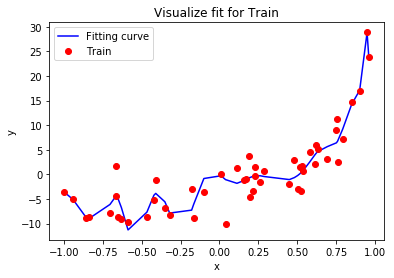

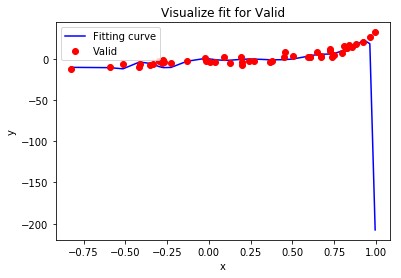

In [4]:
def visualize(xs,ys,ys_pred,data_name,title,degree):
    p1 = polyfit(xs,ys_pred,degree)
    plt.plot(xs,np.polyval(p1,xs),'b-',label='Fitting curve')
    plt.plot(xs,ys,'ro',label=data_name)
    plt.legend()
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title(title)
    plt.show()
visualize(x_train_data, y_train_data,y_train_preds,'Train','Visualize fit for Train',20)
visualize(x_valid_data, y_valid_data,y_valid_preds, 'Valid','Visualize fit for Valid',20)

## Is the model overfitting or underffiting?
The model is overfitting because the MSE validation is too high (The curve oscillates widely towards the end)

## For different values of λ, plot the training MSE and the validation MSE

Train & Validation MSE for different lambdas:
Training: 7.10632820321504 Valid: 1165.7646184958921  lambda = 0
Training: 9.78894449470125 Valid: 12.612590250252113  lambda = 0.0001
Training: 10.505849309235275 Valid: 10.646521973033552  lambda = 0.001
Training: 11.231179690396937 Valid: 11.322213285573058  lambda = 0.01
Training: 12.326563092832114 Valid: 12.803069543869068  lambda = 0.1
Training: 12.912911148906819 Valid: 13.731822311520745  lambda = 0.2
Training: 13.359441561965191 Valid: 14.38981281555192  lambda = 0.3
Training: 13.739422088183327 Valid: 14.896234101019905  lambda = 0.4
Training: 14.079838714960989 Valid: 15.31064401525164  lambda = 0.5
Training: 14.393577054333418 Valid: 15.665458907152725  lambda = 0.6
Training: 14.687746676365649 Valid: 15.979609874637847  lambda = 0.7
Training: 14.966681063510064 Valid: 16.264814834350673  lambda = 0.8
Training: 15.233226814291346 Valid: 16.52868099226591  lambda = 0.9
Training: 15.489366954831484 Valid: 16.776345232905967  lamb

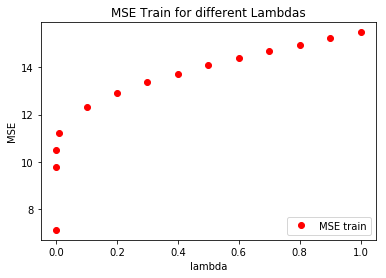

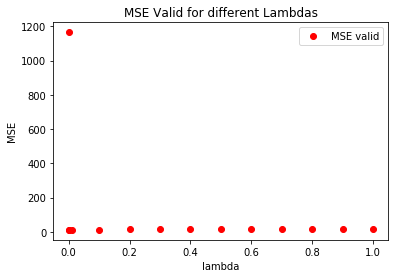

In [5]:
'''Load test set - we don't need this for this question but we'll use it for the Q2.2.b '''
test_data = getData("Dataset_1_test.csv")
x_test_data = test_data.get('x')
y_test_data = test_data.get('y')
x_test = np.array(makeXMatrix(x_test_data, w1))
y_test = np.array(y_test_data).reshape(n,1)
x_test_t = x_valid.transpose()

'''lambdas values from 0 to 1 '''
lambs = [0,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

''' dict {lamda: [mseTrain_l2, mseValid_l2] to store results'''
lamb_mse_dict = {}

I = np.identity(len(x_train_t), dtype = float)

for lamb in lambs:
    ''' Find min w using train set and lambda'''
    ''' w_l2 = (xTx+lI)^-1xTy '''
    w_l2 = inv(np.add(x_train_t.dot(x_train),lamb*I)).dot(x_train_t).dot(y_train)
    #print w_l2
    #print w_l2.shape
    ''' sum(w^2) '''
    sum_w_2 = 0
    for wi in w_l2:
        sum_w_2 += math.pow(wi,2)
    
    ''' transpose w_l2 '''
    w_l2_t = w_l2.transpose()
    y_train_preds_l2 = list(w_l2_t.dot(x_train_t)[0])
    y_valid_preds_l2 = list(w_l2_t.dot(x_valid_t)[0])
    y_test_preds_l2 = list(w_l2_t.dot(x_test_t)[0])
    
    ''' mse for training ''' 
    mseTrain_l2 = compute_mse(y_train_preds_l2, y_train_data) + lamb*sum_w_2/n
    ''' mse for valid ''' 
    mseValid_l2 = compute_mse(y_valid_preds_l2, y_valid_data) + lamb*sum_w_2/n
    ''' mse for test ''' 
    mseTest_l2 = compute_mse(y_test_preds_l2, y_test_data) + lamb*sum_w_2/n
    ''' add lambda, mse's as well as w_l2 to dict '''
    lamb_mse_dict[lamb] = [mseTrain_l2,mseValid_l2,mseTest_l2,y_valid_preds_l2,y_train_preds_l2,y_test_preds_l2,w_l2]
    
'''Output the results'''
print ("Train & Validation MSE for different lambdas:")
for (k,v) in lamb_mse_dict.items():
    print ("Training:", v[0],"Valid:", v[1]," lambda =", k)

mseTrains = []
mseValids = []
for l in lambs:
    mseTrains.append(lamb_mse_dict.get(l)[0])
    mseValids.append(lamb_mse_dict.get(l)[1])

plt.plot(lambs,mseTrains,'ro',label='MSE train')
plt.legend(loc='lower right')
plt.ylabel('MSE')
plt.xlabel('lambda')
plt.title('MSE Train for different Lambdas')
plt.show()

plt.plot(lambs,mseValids,'ro',label='MSE valid')
plt.legend()
plt.ylabel('MSE')
plt.xlabel('lambda')
plt.title('MSE Valid for different Lambdas')
plt.show()

## Pick best lambda and report MSE Test

In [6]:
'''Find the best lambda (find min MSE valid)'''
best = min(lamb_mse_dict.items(), key=lambda x: x[1][1])
'''Get all related values'''
bestLambda = best[0]
bestMSEValid = best[1][1]
MSETest = best[1][2]
MSETrain = best[1][0]
y_train_predictions = best[1][4]
y_valid_predictions = best[1][3]
y_test_predictions = best[1][5]
bestCoefficients = best[1][6]
'''Report best lambda'''
print ("Best lambda =", bestLambda, "since MSE Valid = min =", bestMSEValid)

'''Report test MSE '''
print ("MSE Test:",MSETest)


Best lambda = 0.001 since MSE Valid = min = 10.646521973033552
MSE Test: 31.99459733813365


## Visualize the chosen model

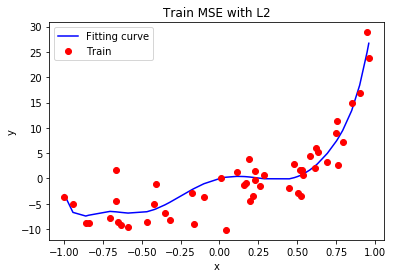

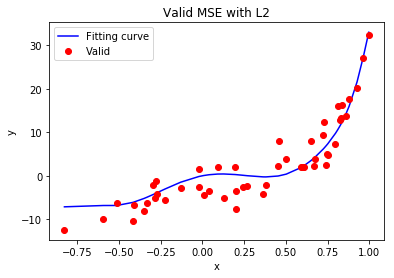

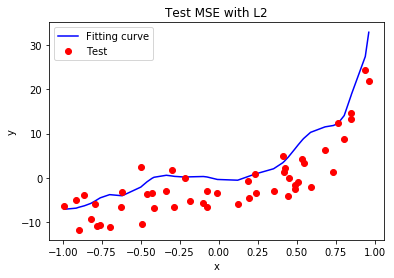

In [7]:
''' Visualize the chosen model '''
visualize(x_train_data, y_train_data, y_train_predictions,'Train','Train MSE with L2',20)
visualize(x_valid_data, y_valid_data, y_valid_predictions,'Valid','Valid MSE with L2',20)
visualize(x_test_data, y_test_data, y_test_predictions,'Test','Test MSE with L2',20)

## Is the model overfitting or underfitting ? Why?
The model is overfitting since some coefficients are really small which indicates that the original function has a degree less than 20

## Degree of the source polynomial
Looking at the coefficients below, the degree should be 8.
Based on the visualization of Test MSE, the degree of the source polynomial is probably around 7 or 8 since we can count the number of "ups" and "downs".

In [8]:
print (bestCoefficients)

[[  7.2667205 ]
 [-32.99636725]
 [ -1.67580904]
 [ 93.38574529]
 [  1.89661115]
 [-40.11876567]
 [  7.64278911]
 [-43.40638947]
 [  8.84645277]
 [ -8.26215509]
 [  4.471464  ]
 [ 20.46683155]
 [ -1.42690274]
 [ 30.46916487]
 [ -5.00976727]
 [ 22.55044604]
 [ -4.40347992]
 [  1.38512192]
 [  0.6336747 ]
 [-28.1309536 ]]


# 3) Gradient descent

In [28]:
'''Load data sets'''
train_data = getData("Dataset_2_train.csv")
valid_data = getData("Dataset_2_valid.csv")
test_data = getData("Dataset_2_test.csv")

'''Sample size n '''
n = len(train_data.get('x'))

def compute_linear_mse(w1,w0,x_data_list,y_data_list):
    sumSquare = 0
    for i in range(0,len(x_data_list)):
        sumSquare += math.pow(y_data_list[i]- (w1*x_data_list[i]+w0),2)
    mse = sumSquare/len(x_data_list)
    return mse

def stochastic_gradient_descent(iterations,step, computeEpochMSEValidEnabled, showLearningCurvesEnabled, visualizeFitEnabled):
    w1 = -2
    w0 = -2
    epoch_mse_valid = []
    epoch_mse_train = []
    visualization_num = 5;

    
    for epoch in range(iterations):
        '''for every epoch, shuffle data '''
        x_train_list = train_data.get('x')
        y_train_list = train_data.get('y')
        c = list(zip(x_train_list,y_train_list))
        random.shuffle(c)
        x_train_list, y_train_list = zip(*c)
        
        '''Start of 1 epoch'''
        for i in range(n):
            
            x = x_train_list[i]
            y = y_train_list[i]
            
            loss = w1*x+w0 - y
            
            
            #Visualize
            if(i>50 and i%20 ==0):
                '''
                t = np.linspace(0, 1.6, 5)
                plt.plot(t,w1*t+w0,'-g')
                #plt.plot(train_data.get('x'), train_data.get('y'),'ro')
                plt.plot(x_train_list[0:i+1], y_train_list[0:i+1],'bo',label='Train data')
                plt.legend()
                plt.draw()
                plt.pause(5)
                '''
            
            
            w1 = w1 - step*loss*x
            w0 = w0 - step*loss

        ''' End of 1 epoch '''
        #print "w0:",w0,"w1:",w1
        #print "Loss:",abs(loss)
        mse_valid = compute_linear_mse(w1, w0,valid_data.get('x'), valid_data.get('y'))
        if computeEpochMSEValidEnabled:
            #3.1.a) Compute MSE on validation set for every epoch
            print ("Epoch", epoch + 1, "MSE Validation:", mse_valid, "w1:", w1)
        mse_train = compute_linear_mse(w1, w0,train_data.get('x'), train_data.get('y'))
        epoch_mse_valid.append(mse_valid)
        epoch_mse_train.append(mse_train)
        
        #3.1 b) Plot the learning curve MSE Validation and Train
        if(showLearningCurvesEnabled):
        #speed up the progress: only show curves after every 100 epochs
            
            if epoch % 200 == 0:
                plt.plot(list(range(len(epoch_mse_valid))),epoch_mse_valid[0:len(epoch_mse_valid)],label='Valid')
                plt.plot(list(range(len(epoch_mse_train))),epoch_mse_train[0:len(epoch_mse_train)],label='Train')
                plt.legend()
                plt.xlabel('Epoch')
                plt.ylabel('MSE')
                plt.draw()
                plt.pause(0.000000000001)
                plt.clf()
         
        if(visualizeFitEnabled):       
                if(visualization_num > 0):
                #Visualize line after each epoch
                    t = np.linspace(0, 1.6, 5)
                    plt.plot(t,w1*t+w0,'-g')
                    plt.plot(test_data.get('x'), test_data.get('y'),'bo',label='Test')
                    plt.legend()
                    plt.draw()
                    plt.pause(1)
                    visualization_num -= 1
                #plt.clf()
                
        '''
        if(toVisualize):
            
                #Visualize line
                t = np.linspace(0, 2, 10)
                plt.plot(t,w1*t+w0,'-g')
                plt.plot(train_data.get('x'), train_data.get('y'),'ro')
                plt.plot(valid_data.get('x'), valid_data.get('y'),'bo')
                plt.draw()
                plt.pause(0.000000000001)
                #plt.clf()
        '''
    #print list(range(len(epoch_mse_valid)))
    #print epoch_mse_valid[0:len(epoch_mse_valid)]
    
    plt.show()
    
    #print w1,w0
    
    
    return {'mseValid':epoch_mse_valid[len(epoch_mse_valid)-1],'w0':w0,'w1':w1}



## Compute Validation MSE for every epoch

In [10]:
s1 = stochastic_gradient_descent(6000,0.000001, True,False,False)

Epoch 1 MSE Validation: 114.44252315159177 w1: -1.9972783303184674
Epoch 2 MSE Validation: 114.32937668909837 w1: -1.9945579885771594
Epoch 3 MSE Validation: 114.21634235031199 w1: -1.991839003176485
Epoch 4 MSE Validation: 114.10342011374289 w1: -1.9891213560400338
Epoch 5 MSE Validation: 113.99060988996467 w1: -1.9864050339404
Epoch 6 MSE Validation: 113.87791151307545 w1: -1.9836900527516466
Epoch 7 MSE Validation: 113.76532499649986 w1: -1.9809764055380292
Epoch 8 MSE Validation: 113.65285008411743 w1: -1.978264087019411
Epoch 9 MSE Validation: 113.54048664652369 w1: -1.9755531068879462
Epoch 10 MSE Validation: 113.4282346271122 w1: -1.972843460643373
Epoch 11 MSE Validation: 113.3160939629234 w1: -1.970135144754692
Epoch 12 MSE Validation: 113.20406450453842 w1: -1.967428157965585
Epoch 13 MSE Validation: 113.09214615215586 w1: -1.9647225030626208
Epoch 14 MSE Validation: 112.98033879965733 w1: -1.9620181814471886
Epoch 15 MSE Validation: 112.86864231220045 w1: -1.9593151876650183

Epoch 136 MSE Validation: 100.13944657482196 w1: -1.6418685716276737
Epoch 137 MSE Validation: 100.0404839906959 w1: -1.639322910196821
Epoch 138 MSE Validation: 99.94161956622631 w1: -1.6367785046458811
Epoch 139 MSE Validation: 99.84285315821879 w1: -1.6342353469928848
Epoch 140 MSE Validation: 99.74418472411014 w1: -1.6316934356189086
Epoch 141 MSE Validation: 99.64561418013528 w1: -1.629152768986648
Epoch 142 MSE Validation: 99.54714137719662 w1: -1.6266133492575283
Epoch 143 MSE Validation: 99.44876622041048 w1: -1.6240751784214098
Epoch 144 MSE Validation: 99.35048852063365 w1: -1.621538266972603
Epoch 145 MSE Validation: 99.25230829948615 w1: -1.6190026054052606
Epoch 146 MSE Validation: 99.15422545782731 w1: -1.6164681843597388
Epoch 147 MSE Validation: 99.05623991156051 w1: -1.613935006537755
Epoch 148 MSE Validation: 98.95835147034501 w1: -1.6114030753239625
Epoch 149 MSE Validation: 98.86056015223053 w1: -1.6088723864318264
Epoch 150 MSE Validation: 98.76286578279392 w1: -1.

Epoch 258 MSE Validation: 88.76243589978885 w1: -1.3403490425103637
Epoch 259 MSE Validation: 88.67475490056347 w1: -1.3379514767494463
Epoch 260 MSE Validation: 88.58716087694894 w1: -1.3355550818673285
Epoch 261 MSE Validation: 88.49965365586002 w1: -1.333159875831091
Epoch 262 MSE Validation: 88.41223329605917 w1: -1.3307658373495195
Epoch 263 MSE Validation: 88.32489957080836 w1: -1.3283729767647487
Epoch 264 MSE Validation: 88.23765243269507 w1: -1.3259812932355566
Epoch 265 MSE Validation: 88.15049176684434 w1: -1.32359078556878
Epoch 266 MSE Validation: 88.06341753643095 w1: -1.321201458048193
Epoch 267 MSE Validation: 87.97642967052221 w1: -1.3188132878441472
Epoch 268 MSE Validation: 87.88952805888583 w1: -1.3164262986812785
Epoch 269 MSE Validation: 87.80271256261129 w1: -1.3140404828522536
Epoch 270 MSE Validation: 87.71598319697029 w1: -1.3116558288931788
Epoch 271 MSE Validation: 87.62933987733166 w1: -1.3092723471364631
Epoch 272 MSE Validation: 87.54278242995564 w1: -1.3

Epoch 399 MSE Validation: 77.21939898510283 w1: -1.0136490986485727
Epoch 400 MSE Validation: 77.14316324802785 w1: -1.0114118912587342
Epoch 401 MSE Validation: 77.06700315371279 w1: -1.0091757768391891
Epoch 402 MSE Validation: 76.99091859838042 w1: -1.0069407496509217
Epoch 403 MSE Validation: 76.91490937965115 w1: -1.0047068339122995
Epoch 404 MSE Validation: 76.83897555157493 w1: -1.0024740106275778
Epoch 405 MSE Validation: 76.76311700666632 w1: -1.000242283532171
Epoch 406 MSE Validation: 76.68733369548153 w1: -0.9980116512350345
Epoch 407 MSE Validation: 76.61162554456932 w1: -0.9957821121896785
Epoch 408 MSE Validation: 76.53599238250273 w1: -0.9935536746780569
Epoch 409 MSE Validation: 76.46043430464513 w1: -0.991326322546022
Epoch 410 MSE Validation: 76.38495105827862 w1: -0.9891000688599348
Epoch 411 MSE Validation: 76.30954270010949 w1: -0.9868748994980403
Epoch 412 MSE Validation: 76.23420906938854 w1: -0.9846508264289205
Epoch 413 MSE Validation: 76.15895016536723 w1: -0

Epoch 552 MSE Validation: 66.39195437316798 w1: -0.6838067635770279
Epoch 553 MSE Validation: 66.32645340388905 w1: -0.6817313252130238
Epoch 554 MSE Validation: 66.2610173388809 w1: -0.679656897388442
Epoch 555 MSE Validation: 66.19564617650138 w1: -0.6775834949831714
Epoch 556 MSE Validation: 66.1303399067886 w1: -0.6755111025289161
Epoch 557 MSE Validation: 66.06509836586999 w1: -0.6734397242903508
Epoch 558 MSE Validation: 65.99992144406184 w1: -0.6713693639337706
Epoch 559 MSE Validation: 65.93480918150945 w1: -0.6693000132603251
Epoch 560 MSE Validation: 65.86976147404226 w1: -0.667231682803497
Epoch 561 MSE Validation: 65.80477824631329 w1: -0.665164363329254
Epoch 562 MSE Validation: 65.73985944151865 w1: -0.6630980620240189
Epoch 563 MSE Validation: 65.67500502325903 w1: -0.66103276638205
Epoch 564 MSE Validation: 65.61021484926182 w1: -0.6589684850265589
Epoch 565 MSE Validation: 65.54548891332321 w1: -0.6569052190942225
Epoch 566 MSE Validation: 65.4808271689072 w1: -0.65484

Epoch 689 MSE Validation: 57.99714691154698 w1: -0.4087412790519741
Epoch 690 MSE Validation: 57.93996805628304 w1: -0.40680062516244825
Epoch 691 MSE Validation: 57.882845929495545 w1: -0.40486091988076633
Epoch 692 MSE Validation: 57.82578042082872 w1: -0.4029221656329856
Epoch 693 MSE Validation: 57.7687715388977 w1: -0.4009843569713843
Epoch 694 MSE Validation: 57.71181910497211 w1: -0.3990474998659712
Epoch 695 MSE Validation: 57.65492316731424 w1: -0.3971115920752593
Epoch 696 MSE Validation: 57.59808364624087 w1: -0.39517663087409916
Epoch 697 MSE Validation: 57.54130045394426 w1: -0.39324261916671704
Epoch 698 MSE Validation: 57.48457353812049 w1: -0.3913095579870841
Epoch 699 MSE Validation: 57.4279028664847 w1: -0.3893774378565524
Epoch 700 MSE Validation: 57.3712883475359 w1: -0.387446269769305
Epoch 701 MSE Validation: 57.314730002892695 w1: -0.38551604583139937
Epoch 702 MSE Validation: 57.258227723606225 w1: -0.3835867628570165
Epoch 703 MSE Validation: 57.20178147153315 

Epoch 850 MSE Validation: 49.484487052031 w1: -0.10822368902848643
Epoch 851 MSE Validation: 49.43574632898558 w1: -0.10643015675843628
Epoch 852 MSE Validation: 49.3870539200598 w1: -0.10463750350394092
Epoch 853 MSE Validation: 49.33840974582605 w1: -0.10284572892565384
Epoch 854 MSE Validation: 49.28981377769608 w1: -0.10105482876071437
Epoch 855 MSE Validation: 49.241265977082165 w1: -0.09926481113751444
Epoch 856 MSE Validation: 49.192766285593954 w1: -0.09747567079342516
Epoch 857 MSE Validation: 49.14431468291105 w1: -0.09568740225750472
Epoch 858 MSE Validation: 49.09591111772075 w1: -0.0939000061702702
Epoch 859 MSE Validation: 49.04755553541089 w1: -0.09211348780548378
Epoch 860 MSE Validation: 48.99924786602086 w1: -0.09032784244945632
Epoch 861 MSE Validation: 48.95098808868848 w1: -0.0885430677972207
Epoch 862 MSE Validation: 48.90277609676669 w1: -0.08675917059532448
Epoch 863 MSE Validation: 48.854611879953445 w1: -0.08497615060081994
Epoch 864 MSE Validation: 48.8064954

Epoch 1135 MSE Validation: 37.37765698400558 w1: 0.36902047176139996
Epoch 1136 MSE Validation: 37.340914799537046 w1: 0.37058070572728063
Epoch 1137 MSE Validation: 37.30420896804976 w1: 0.3721401761869244
Epoch 1138 MSE Validation: 37.267539490896894 w1: 0.373698879469151
Epoch 1139 MSE Validation: 37.23090636296992 w1: 0.3752568234931319
Epoch 1140 MSE Validation: 37.19430957928621 w1: 0.3768140077024343
Epoch 1141 MSE Validation: 37.15774904048628 w1: 0.3783704330541519
Epoch 1142 MSE Validation: 37.1212247006973 w1: 0.3799260941807059
Epoch 1143 MSE Validation: 37.08473657926588 w1: 0.38148099987165884
Epoch 1144 MSE Validation: 37.04828458633308 w1: 0.38303514254989557
Epoch 1145 MSE Validation: 37.01186874490157 w1: 0.3845885304036359
Epoch 1146 MSE Validation: 36.97548900935574 w1: 0.38614115888661893
Epoch 1147 MSE Validation: 36.939145279984494 w1: 0.38769302767731156
Epoch 1148 MSE Validation: 36.90283759713846 w1: 0.389244139447226
Epoch 1149 MSE Validation: 36.866565906732

Epoch 1259 MSE Validation: 33.08840145801813 w1: 0.5567942154235833
Epoch 1260 MSE Validation: 33.05590925899806 w1: 0.5582627863106036
Epoch 1261 MSE Validation: 33.02344927980894 w1: 0.5597306482752256
Epoch 1262 MSE Validation: 32.99102147222026 w1: 0.5611977939125794
Epoch 1263 MSE Validation: 32.958625755322 w1: 0.5626642231228094
Epoch 1264 MSE Validation: 32.926262172645686 w1: 0.5641299384290968
Epoch 1265 MSE Validation: 32.893930664172544 w1: 0.5655949412494572
Epoch 1266 MSE Validation: 32.86163116617571 w1: 0.5670592297009258
Epoch 1267 MSE Validation: 32.82936368115646 w1: 0.5685227981337306
Epoch 1268 MSE Validation: 32.79712814576706 w1: 0.5699856544583755
Epoch 1269 MSE Validation: 32.76492453373299 w1: 0.5714477956115254
Epoch 1270 MSE Validation: 32.73275282225813 w1: 0.572909218823601
Epoch 1271 MSE Validation: 32.7006130613063 w1: 0.5743699370806798
Epoch 1272 MSE Validation: 32.66850511579505 w1: 0.5758299419769453
Epoch 1273 MSE Validation: 32.63642898037007 w1: 0

Epoch 1468 MSE Validation: 26.951748037949887 w1: 0.8486739676214337
Epoch 1469 MSE Validation: 26.925335342337952 w1: 0.8500002719998172
Epoch 1470 MSE Validation: 26.898948832345145 w1: 0.8513259326991696
Epoch 1471 MSE Validation: 26.872588442593404 w1: 0.8526509453877619
Epoch 1472 MSE Validation: 26.84625421361754 w1: 0.8539753167119758
Epoch 1473 MSE Validation: 26.819945994745016 w1: 0.8552990369088015
Epoch 1474 MSE Validation: 26.793663886580394 w1: 0.8566221165154289
Epoch 1475 MSE Validation: 26.767407755018095 w1: 0.8579445466889736
Epoch 1476 MSE Validation: 26.741177687322644 w1: 0.8592663397367417
Epoch 1477 MSE Validation: 26.714973581790282 w1: 0.8605874839355403
Epoch 1478 MSE Validation: 26.688795432833416 w1: 0.8619079869989102
Epoch 1479 MSE Validation: 26.66264322150698 w1: 0.8632278475990129
Epoch 1480 MSE Validation: 26.63651690629841 w1: 0.8645470654866864
Epoch 1481 MSE Validation: 26.61041648282703 w1: 0.8658656405800956
Epoch 1482 MSE Validation: 26.58434189

Epoch 1717 MSE Validation: 21.120687758443975 w1: 1.1597709604103612
Epoch 1718 MSE Validation: 21.10005025428456 w1: 1.1609459310294858
Epoch 1719 MSE Validation: 21.079433173706704 w1: 1.162120330311988
Epoch 1720 MSE Validation: 21.05883649627414 w1: 1.1632941590163863
Epoch 1721 MSE Validation: 21.038260248123507 w1: 1.1644674195131755
Epoch 1722 MSE Validation: 21.0177043744606 w1: 1.1656401103355947
Epoch 1723 MSE Validation: 20.99716883784257 w1: 1.166812232627172
Epoch 1724 MSE Validation: 20.976653646661504 w1: 1.1679837847521672
Epoch 1725 MSE Validation: 20.956158773913465 w1: 1.1691547644736793
Epoch 1726 MSE Validation: 20.935684194619533 w1: 1.1703251779538382
Epoch 1727 MSE Validation: 20.91522989753115 w1: 1.1714950230982815
Epoch 1728 MSE Validation: 20.89479585384044 w1: 1.17266429777677
Epoch 1729 MSE Validation: 20.874382039429964 w1: 1.173833004543126
Epoch 1730 MSE Validation: 20.85398845128161 w1: 1.1750011437636991
Epoch 1731 MSE Validation: 20.833615027237332 w

Epoch 1941 MSE Validation: 16.97281164218734 w1: 1.4092153309473012
Epoch 1942 MSE Validation: 16.956280873984714 w1: 1.4102692407159705
Epoch 1943 MSE Validation: 16.93976647456686 w1: 1.4113226418610003
Epoch 1944 MSE Validation: 16.92326843272828 w1: 1.4123755293370193
Epoch 1945 MSE Validation: 16.906786730917666 w1: 1.4134279069062838
Epoch 1946 MSE Validation: 16.89032134866401 w1: 1.4144797779446594
Epoch 1947 MSE Validation: 16.873872272680025 w1: 1.4155311354494322
Epoch 1948 MSE Validation: 16.857439478242608 w1: 1.4165819826917538
Epoch 1949 MSE Validation: 16.84102294317248 w1: 1.4176323247455416
Epoch 1950 MSE Validation: 16.824622658234897 w1: 1.4186821559429947
Epoch 1951 MSE Validation: 16.80823860350822 w1: 1.4197314768419962
Epoch 1952 MSE Validation: 16.791870735753413 w1: 1.4207802887844803
Epoch 1953 MSE Validation: 16.775519120168095 w1: 1.4218285963266875
Epoch 1954 MSE Validation: 16.759183699793027 w1: 1.4228763933304351
Epoch 1955 MSE Validation: 16.7428644094

Epoch 2134 MSE Validation: 14.067298856372782 w1: 1.6034465197110155
Epoch 2135 MSE Validation: 14.05364385958695 w1: 1.6044063791029626
Epoch 2136 MSE Validation: 14.040002394062121 w1: 1.605365775976994
Epoch 2137 MSE Validation: 14.026374419299355 w1: 1.6063247059368442
Epoch 2138 MSE Validation: 14.01275993888029 w1: 1.6072831743918286
Epoch 2139 MSE Validation: 13.999158908189901 w1: 1.6082411798086824
Epoch 2140 MSE Validation: 13.985571329536388 w1: 1.6091987203699103
Epoch 2141 MSE Validation: 13.971997211488281 w1: 1.6101558002771141
Epoch 2142 MSE Validation: 13.958436525342037 w1: 1.61111241592595
Epoch 2143 MSE Validation: 13.944889252504163 w1: 1.6120685688099572
Epoch 2144 MSE Validation: 13.931355376156507 w1: 1.6130242570740196
Epoch 2145 MSE Validation: 13.917834905036777 w1: 1.6139794858032708
Epoch 2146 MSE Validation: 13.904327811253763 w1: 1.614934249707712
Epoch 2147 MSE Validation: 13.890834096028899 w1: 1.6158885510016636
Epoch 2148 MSE Validation: 13.8773537278

Epoch 2300 MSE Validation: 11.975989409976892 w1: 1.7565941775013734
Epoch 2301 MSE Validation: 11.964403632809407 w1: 1.7574800376845456
Epoch 2302 MSE Validation: 11.9528293143099 w1: 1.758365470887804
Epoch 2303 MSE Validation: 11.94126644212939 w1: 1.7592504762202257
Epoch 2304 MSE Validation: 11.92971501220742 w1: 1.7601350529893023
Epoch 2305 MSE Validation: 11.918175014424023 w1: 1.761019206664466
Epoch 2306 MSE Validation: 11.906646408051381 w1: 1.7619029326874565
Epoch 2307 MSE Validation: 11.895129207064143 w1: 1.7627862315257075
Epoch 2308 MSE Validation: 11.883623416132673 w1: 1.76366910666491
Epoch 2309 MSE Validation: 11.872128998569744 w1: 1.7645515532293539
Epoch 2310 MSE Validation: 11.860645940849093 w1: 1.7654335751071395
Epoch 2311 MSE Validation: 11.849174258261801 w1: 1.7663151692268408
Epoch 2312 MSE Validation: 11.83771394484801 w1: 1.7671963406320994
Epoch 2313 MSE Validation: 11.826264938098431 w1: 1.7680770851581
Epoch 2314 MSE Validation: 11.814827265055044 

Epoch 2509 MSE Validation: 9.78748023406968 w1: 1.9327551217475916
Epoch 2510 MSE Validation: 9.778059001797079 w1: 1.9335560695485892
Epoch 2511 MSE Validation: 9.768647082469814 w1: 1.934356634238396
Epoch 2512 MSE Validation: 9.759244459525252 w1: 1.9351568099430827
Epoch 2513 MSE Validation: 9.749851120138985 w1: 1.935956600519824
Epoch 2514 MSE Validation: 9.740467097358872 w1: 1.9367560077080257
Epoch 2515 MSE Validation: 9.73109235709722 w1: 1.9375550301758062
Epoch 2516 MSE Validation: 9.721726887905044 w1: 1.9383536672269674
Epoch 2517 MSE Validation: 9.712370678621069 w1: 1.9391519206024972
Epoch 2518 MSE Validation: 9.703023698812242 w1: 1.9399497898450768
Epoch 2519 MSE Validation: 9.693685973391892 w1: 1.9407472740117073
Epoch 2520 MSE Validation: 9.68435747784752 w1: 1.9415443758875566
Epoch 2521 MSE Validation: 9.675038185543123 w1: 1.9423410948316107
Epoch 2522 MSE Validation: 9.66572810074299 w1: 1.9431374272056305
Epoch 2523 MSE Validation: 9.656427237201246 w1: 1.943

Epoch 2717 MSE Validation: 8.015429695111127 w1: 2.0913284887996464
Epoch 2718 MSE Validation: 8.007760243719336 w1: 2.0920532271228414
Epoch 2719 MSE Validation: 8.000098371280373 w1: 2.0927776151790516
Epoch 2720 MSE Validation: 7.9924440686923734 w1: 2.0935016571159117
Epoch 2721 MSE Validation: 7.984797333067689 w1: 2.0942253526910917
Epoch 2722 MSE Validation: 7.977158147620745 w1: 2.0949487010715035
Epoch 2723 MSE Validation: 7.969526515564773 w1: 2.0956717010216
Epoch 2724 MSE Validation: 7.96190241150794 w1: 2.096394356020568
Epoch 2725 MSE Validation: 7.95428585597566 w1: 2.0971166629357496
Epoch 2726 MSE Validation: 7.946676826457641 w1: 2.0978386241263722
Epoch 2727 MSE Validation: 7.93907532302866 w1: 2.0985602397326852
Epoch 2728 MSE Validation: 7.931481314534648 w1: 2.099281507404991
Epoch 2729 MSE Validation: 7.923894830199084 w1: 2.1000024300380398
Epoch 2730 MSE Validation: 7.916315839541198 w1: 2.1007230048714667
Epoch 2731 MSE Validation: 7.908744338463947 w1: 2.1014

Epoch 2931 MSE Validation: 6.535424479062429 w1: 2.2387670137984728
Epoch 2932 MSE Validation: 6.529217265890777 w1: 2.2394211244094
Epoch 2933 MSE Validation: 6.5230161907191055 w1: 2.240074921528178
Epoch 2934 MSE Validation: 6.516821254304107 w1: 2.24072840505175
Epoch 2935 MSE Validation: 6.510632421956577 w1: 2.2413815763899763
Epoch 2936 MSE Validation: 6.504449699684829 w1: 2.2420344366697074
Epoch 2937 MSE Validation: 6.498273082228689 w1: 2.2426869846094566
Epoch 2938 MSE Validation: 6.492102563341349 w1: 2.2433392204428872
Epoch 2939 MSE Validation: 6.485938147396563 w1: 2.243991143804956
Epoch 2940 MSE Validation: 6.479779820140005 w1: 2.2446427555696427
Epoch 2941 MSE Validation: 6.473627576843184 w1: 2.2452940551936487
Epoch 2942 MSE Validation: 6.467481415231697 w1: 2.2459450455753354
Epoch 2943 MSE Validation: 6.46134130283079 w1: 2.2465957252451854
Epoch 2944 MSE Validation: 6.4552072797534406 w1: 2.2472460924021425
Epoch 2945 MSE Validation: 6.449079306336711 w1: 2.247

Epoch 3133 MSE Validation: 5.398197889405402 w1: 2.3647521812379524
Epoch 3134 MSE Validation: 5.393113530814059 w1: 2.3653461544065846
Epoch 3135 MSE Validation: 5.388034196089627 w1: 2.365939844625524
Epoch 3136 MSE Validation: 5.382959873581433 w1: 2.3665332525413376
Epoch 3137 MSE Validation: 5.3778905749596735 w1: 2.367126375530831
Epoch 3138 MSE Validation: 5.372826264219217 w1: 2.367719216229473
Epoch 3139 MSE Validation: 5.3677669569906 w1: 2.3683117756100964
Epoch 3140 MSE Validation: 5.362712635661934 w1: 2.3689040534094046
Epoch 3141 MSE Validation: 5.357663302345627 w1: 2.3694960482125498
Epoch 3142 MSE Validation: 5.352618953071004 w1: 2.3700877614169498
Epoch 3143 MSE Validation: 5.347579575136735 w1: 2.370679190379782
Epoch 3144 MSE Validation: 5.342545167869238 w1: 2.3712703398721997
Epoch 3145 MSE Validation: 5.337515737544689 w1: 2.371861206453781
Epoch 3146 MSE Validation: 5.332491281447412 w1: 2.3724517921541914
Epoch 3147 MSE Validation: 5.3274717732160175 w1: 2.37

Epoch 3332 MSE Validation: 4.479146375370961 w1: 2.4775543625185965
Epoch 3333 MSE Validation: 4.4749688117989646 w1: 2.4780946901399483
Epoch 3334 MSE Validation: 4.470795363363614 w1: 2.4786347619732054
Epoch 3335 MSE Validation: 4.46662602376378 w1: 2.4791745792670326
Epoch 3336 MSE Validation: 4.462460804762932 w1: 2.479714138537905
Epoch 3337 MSE Validation: 4.458299678675729 w1: 2.480253442097665
Epoch 3338 MSE Validation: 4.454142669374098 w1: 2.4807924902731298
Epoch 3339 MSE Validation: 4.4499897661612104 w1: 2.4813312812215575
Epoch 3340 MSE Validation: 4.445840951360901 w1: 2.4818698170775435
Epoch 3341 MSE Validation: 4.441696235095265 w1: 2.482408098010122
Epoch 3342 MSE Validation: 4.437555603236553 w1: 2.482946121701222
Epoch 3343 MSE Validation: 4.433419056278441 w1: 2.483483891076835
Epoch 3344 MSE Validation: 4.429286586708909 w1: 2.4840214062956
Epoch 3345 MSE Validation: 4.425158192106649 w1: 2.4845586657020933
Epoch 3346 MSE Validation: 4.421033857534506 w1: 2.4850

Epoch 3542 MSE Validation: 3.6863691988123475 w1: 2.5855841007668965
Epoch 3543 MSE Validation: 3.682973166055654 w1: 2.5860732686627887
Epoch 3544 MSE Validation: 3.6795804624241297 w1: 2.5865622060275197
Epoch 3545 MSE Validation: 3.676191101312394 w1: 2.587050912491383
Epoch 3546 MSE Validation: 3.672805083927376 w1: 2.587539387905502
Epoch 3547 MSE Validation: 3.66942239594127 w1: 2.588027634779126
Epoch 3548 MSE Validation: 3.6660430489603435 w1: 2.5885156487457026
Epoch 3549 MSE Validation: 3.6626670233608962 w1: 2.5890034328318947
Epoch 3550 MSE Validation: 3.659294342331738 w1: 2.589490985750738
Epoch 3551 MSE Validation: 3.655924964881077 w1: 2.589978307751535
Epoch 3552 MSE Validation: 3.652558923092514 w1: 2.5904654000657645
Epoch 3553 MSE Validation: 3.649196200074899 w1: 2.5909522615817733
Epoch 3554 MSE Validation: 3.645836788145188 w1: 2.591438895041917
Epoch 3555 MSE Validation: 3.6424806709981272 w1: 2.59192529731461
Epoch 3556 MSE Validation: 3.639127863087296 w1: 2.5

Epoch 3717 MSE Validation: 3.140217781711689 w1: 2.6677680832604755
Epoch 3718 MSE Validation: 3.1373596311180796 w1: 2.668218498378993
Epoch 3719 MSE Validation: 3.134504300458835 w1: 2.668668702139007
Epoch 3720 MSE Validation: 3.1316517924017115 w1: 2.6691186924105854
Epoch 3721 MSE Validation: 3.128802079587012 w1: 2.669568472057348
Epoch 3722 MSE Validation: 3.125955178514476 w1: 2.6700180392124624
Epoch 3723 MSE Validation: 3.1231110725117395 w1: 2.670467395352043
Epoch 3724 MSE Validation: 3.1202697670455812 w1: 2.670916540038599
Epoch 3725 MSE Validation: 3.117431268381271 w1: 2.671365474414634
Epoch 3726 MSE Validation: 3.114595558985708 w1: 2.671814197055869
Epoch 3727 MSE Validation: 3.111762646303566 w1: 2.6722627075603764
Epoch 3728 MSE Validation: 3.1089325117110906 w1: 2.672711007359136
Epoch 3729 MSE Validation: 3.106105169673585 w1: 2.673159095967487
Epoch 3730 MSE Validation: 3.1032806116569005 w1: 2.673606973840816
Epoch 3731 MSE Validation: 3.1004588335270107 w1: 2.

Epoch 3858 MSE Validation: 2.7637593083841936 w1: 2.729231771254533
Epoch 3859 MSE Validation: 2.7612716137237276 w1: 2.7296533127589573
Epoch 3860 MSE Validation: 2.7587863743164562 w1: 2.7300746572632093
Epoch 3861 MSE Validation: 2.7563035767553057 w1: 2.7304958027954953
Epoch 3862 MSE Validation: 2.753823228578459 w1: 2.7309167517972543
Epoch 3863 MSE Validation: 2.7513453187772354 w1: 2.731337502887146
Epoch 3864 MSE Validation: 2.748869849010509 w1: 2.7317580560424637
Epoch 3865 MSE Validation: 2.7463968109595327 w1: 2.7321784134398506
Epoch 3866 MSE Validation: 2.7439262017022616 w1: 2.732598573497403
Epoch 3867 MSE Validation: 2.741458018579268 w1: 2.733018536493587
Epoch 3868 MSE Validation: 2.7389922757836986 w1: 2.7334383018539166
Epoch 3869 MSE Validation: 2.736528947404316 w1: 2.7338578705933476
Epoch 3870 MSE Validation: 2.734068050139701 w1: 2.7342772427845254
Epoch 3871 MSE Validation: 2.7316095684204016 w1: 2.734696418376324
Epoch 3872 MSE Validation: 2.72915351843553 

Epoch 4044 MSE Validation: 2.3407061804712455 w1: 2.8043385419345377
Epoch 4045 MSE Validation: 2.3386343909129117 w1: 2.804724949576987
Epoch 4046 MSE Validation: 2.3365646361907766 w1: 2.805111177053164
Epoch 4047 MSE Validation: 2.3344969088043186 w1: 2.805497225054372
Epoch 4048 MSE Validation: 2.3324312103845064 w1: 2.8058830926262
Epoch 4049 MSE Validation: 2.330367541571187 w1: 2.806268779865399
Epoch 4050 MSE Validation: 2.328305904750625 w1: 2.80665428725442
Epoch 4051 MSE Validation: 2.3262462911056945 w1: 2.8070396140513885
Epoch 4052 MSE Validation: 2.324188706081518 w1: 2.8074247612940932
Epoch 4053 MSE Validation: 2.322133145277028 w1: 2.8078097288856494
Epoch 4054 MSE Validation: 2.3200796030709214 w1: 2.8081945172076357
Epoch 4055 MSE Validation: 2.318028080411982 w1: 2.808579125293927
Epoch 4056 MSE Validation: 2.3159785645903694 w1: 2.808963555358198
Epoch 4057 MSE Validation: 2.3139310573762693 w1: 2.809347806571556
Epoch 4058 MSE Validation: 2.311885576281172 w1: 2.

Epoch 4165 MSE Validation: 2.1042330473859607 w1: 2.8498102706172213
Epoch 4166 MSE Validation: 2.1023934915305422 w1: 2.8501754963117816
Epoch 4167 MSE Validation: 2.100555722133143 w1: 2.8505405538179907
Epoch 4168 MSE Validation: 2.0987197633269137 w1: 2.8509054415952853
Epoch 4169 MSE Validation: 2.096885609036908 w1: 2.8512701599844315
Epoch 4170 MSE Validation: 2.0950532552986014 w1: 2.8516347087942564
Epoch 4171 MSE Validation: 2.093222690759603 w1: 2.8519990883203485
Epoch 4172 MSE Validation: 2.091393927331338 w1: 2.8523632973372597
Epoch 4173 MSE Validation: 2.0895669624433815 w1: 2.852727336196611
Epoch 4174 MSE Validation: 2.087741790005395 w1: 2.853091207401379
Epoch 4175 MSE Validation: 2.085918412985445 w1: 2.853454908730451
Epoch 4176 MSE Validation: 2.0840968189041402 w1: 2.8538184412401226
Epoch 4177 MSE Validation: 2.0822770060599134 w1: 2.854181805461343
Epoch 4178 MSE Validation: 2.0804589937750166 w1: 2.8545449996534766
Epoch 4179 MSE Validation: 2.078642764716196

Epoch 4381 MSE Validation: 1.7460056083937276 w1: 2.924891515169125
Epoch 4382 MSE Validation: 1.7445173803560328 w1: 2.9252219421560857
Epoch 4383 MSE Validation: 1.7430306141678773 w1: 2.925552216985057
Epoch 4384 MSE Validation: 1.7415452932946602 w1: 2.9258823403355754
Epoch 4385 MSE Validation: 1.7400614361750693 w1: 2.926212310691387
Epoch 4386 MSE Validation: 1.7385790294759134 w1: 2.9265421281273007
Epoch 4387 MSE Validation: 1.7370980828439593 w1: 2.926871793090942
Epoch 4388 MSE Validation: 1.7356185833276447 w1: 2.927201305786908
Epoch 4389 MSE Validation: 1.7341405283738567 w1: 2.927530667184403
Epoch 4390 MSE Validation: 1.7326639260497618 w1: 2.927859876259434
Epoch 4391 MSE Validation: 1.731188763481311 w1: 2.9281889333165076
Epoch 4392 MSE Validation: 1.7297150505904262 w1: 2.9285178380180006
Epoch 4393 MSE Validation: 1.7282427797842477 w1: 2.928846591234527
Epoch 4394 MSE Validation: 1.7267719419480319 w1: 2.929175193288264
Epoch 4395 MSE Validation: 1.725302564110858

Epoch 4578 MSE Validation: 1.4792511839344191 w1: 2.987131611994662
Epoch 4579 MSE Validation: 1.4780241005544754 w1: 2.987433382697164
Epoch 4580 MSE Validation: 1.4767982248804628 w1: 2.9877350145561006
Epoch 4581 MSE Validation: 1.475573538175099 w1: 2.9880365085380243
Epoch 4582 MSE Validation: 1.4743500464965018 w1: 2.988337864724895
Epoch 4583 MSE Validation: 1.473127756233503 w1: 2.9886390813979253
Epoch 4584 MSE Validation: 1.4719066572561599 w1: 2.988940160986587
Epoch 4585 MSE Validation: 1.4706867475190781 w1: 2.9892411028910666
Epoch 4586 MSE Validation: 1.4694680397460593 w1: 2.9895419054420023
Epoch 4587 MSE Validation: 1.4682505236073595 w1: 2.989842569785858
Epoch 4588 MSE Validation: 1.4670341953462287 w1: 2.990143096332366
Epoch 4589 MSE Validation: 1.4658190582348483 w1: 2.990443485688835
Epoch 4590 MSE Validation: 1.464605107347633 w1: 2.990743737719284
Epoch 4591 MSE Validation: 1.4633923383846557 w1: 2.991043851849833
Epoch 4592 MSE Validation: 1.4621807587031597 

Epoch 4799 MSE Validation: 1.2352431741947185 w1: 3.0505749170061187
Epoch 4800 MSE Validation: 1.2342544469223038 w1: 3.0508476899672057
Epoch 4801 MSE Validation: 1.2332666842591526 w1: 3.0511203391038313
Epoch 4802 MSE Validation: 1.2322798868724774 w1: 3.051392863146358
Epoch 4803 MSE Validation: 1.2312940570274247 w1: 3.0516652631488874
Epoch 4804 MSE Validation: 1.2303091823541867 w1: 3.0519375395523642
Epoch 4805 MSE Validation: 1.2293252718093337 w1: 3.0522096919679758
Epoch 4806 MSE Validation: 1.2283423209370528 w1: 3.0524817201809706
Epoch 4807 MSE Validation: 1.2273603314063577 w1: 3.0527536249840246
Epoch 4808 MSE Validation: 1.2263792934644966 w1: 3.053025406865297
Epoch 4809 MSE Validation: 1.2253992178185158 w1: 3.053297063857702
Epoch 4810 MSE Validation: 1.2244200990872762 w1: 3.0535685977493845
Epoch 4811 MSE Validation: 1.2234419328403403 w1: 3.053840008846424
Epoch 4812 MSE Validation: 1.222464720395495 w1: 3.054111296103801
Epoch 4813 MSE Validation: 1.22148845780

Epoch 4966 MSE Validation: 1.0827980052428445 w1: 3.0944529139623036
Epoch 4967 MSE Validation: 1.0819578448108758 w1: 3.0947057808269567
Epoch 4968 MSE Validation: 1.0811185008884068 w1: 3.0949585333861127
Epoch 4969 MSE Validation: 1.08027998478456 w1: 3.0952111695297675
Epoch 4970 MSE Validation: 1.0794422737322018 w1: 3.095463694099681
Epoch 4971 MSE Validation: 1.07860537820962 w1: 3.0957161038775256
Epoch 4972 MSE Validation: 1.0777692942118835 w1: 3.095968400254718
Epoch 4973 MSE Validation: 1.0769340341116547 w1: 3.0962205806402174
Epoch 4974 MSE Validation: 1.0760995731191263 w1: 3.0964726495110457
Epoch 4975 MSE Validation: 1.0752659383646983 w1: 3.0967246019344015
Epoch 4976 MSE Validation: 1.0744331088887322 w1: 3.096976441617492
Epoch 4977 MSE Validation: 1.0736010931270439 w1: 3.097228167100589
Epoch 4978 MSE Validation: 1.0727698885573178 w1: 3.0974797779064396
Epoch 4979 MSE Validation: 1.0719394912904077 w1: 3.097731275679147
Epoch 4980 MSE Validation: 1.07110990265447

Epoch 5132 MSE Validation: 0.9539509618792095 w1: 3.1349043640166205
Epoch 5133 MSE Validation: 0.9532360813960029 w1: 3.135139003439639
Epoch 5134 MSE Validation: 0.9525218937867667 w1: 3.135373538062494
Epoch 5135 MSE Validation: 0.9518083978090579 w1: 3.135607967242687
Epoch 5136 MSE Validation: 0.9510955991127876 w1: 3.1358422903138647
Epoch 5137 MSE Validation: 0.9503834887355468 w1: 3.136076508820393
Epoch 5138 MSE Validation: 0.9496720742808423 w1: 3.1363106214277092
Epoch 5139 MSE Validation: 0.948961345596604 w1: 3.136544630334094
Epoch 5140 MSE Validation: 0.9482513054385658 w1: 3.1367785345003565
Epoch 5141 MSE Validation: 0.9475419557345544 w1: 3.1370123332060986
Epoch 5142 MSE Validation: 0.9468332972832318 w1: 3.1372460263540827
Epoch 5143 MSE Validation: 0.9461253257242432 w1: 3.1374796152977176
Epoch 5144 MSE Validation: 0.9454180399051908 w1: 3.13771309967774
Epoch 5145 MSE Validation: 0.9447114413250952 w1: 3.137946478666155
Epoch 5146 MSE Validation: 0.94400553160932

Epoch 5299 MSE Validation: 0.8436860608341239 w1: 3.172667890278949
Epoch 5300 MSE Validation: 0.8430781117812545 w1: 3.172885638451625
Epoch 5301 MSE Validation: 0.842470747845677 w1: 3.1731032902848955
Epoch 5302 MSE Validation: 0.8418639717280153 w1: 3.1733208446881895
Epoch 5303 MSE Validation: 0.8412577845413522 w1: 3.1735383020227563
Epoch 5304 MSE Validation: 0.8406521785869194 w1: 3.1737556643538793
Epoch 5305 MSE Validation: 0.8400471645893387 w1: 3.1739729279590887
Epoch 5306 MSE Validation: 0.8394427365926876 w1: 3.1741900952421314
Epoch 5307 MSE Validation: 0.8388388938994281 w1: 3.1744071660847486
Epoch 5308 MSE Validation: 0.8382356400502453 w1: 3.174624138769228
Epoch 5309 MSE Validation: 0.8376329649805956 w1: 3.1748410161536507
Epoch 5310 MSE Validation: 0.8370308760442132 w1: 3.1750577967074465
Epoch 5311 MSE Validation: 0.8364293691506275 w1: 3.1752744811497875
Epoch 5312 MSE Validation: 0.8358284474050189 w1: 3.175491067847923
Epoch 5313 MSE Validation: 0.8352281040

Epoch 5491 MSE Validation: 0.7371096633181204 w1: 3.212751054479569
Epoch 5492 MSE Validation: 0.736604730609552 w1: 3.21295102704588
Epoch 5493 MSE Validation: 0.7361002806487552 w1: 3.2131509117618644
Epoch 5494 MSE Validation: 0.7355963220157361 w1: 3.213350707365474
Epoch 5495 MSE Validation: 0.7350928500080852 w1: 3.213550414573101
Epoch 5496 MSE Validation: 0.7345898604789464 w1: 3.2137500349558823
Epoch 5497 MSE Validation: 0.7340873604481462 w1: 3.213949565898967
Epoch 5498 MSE Validation: 0.7335853423059946 w1: 3.2141490092667624
Epoch 5499 MSE Validation: 0.7330838101369507 w1: 3.214348364029169
Epoch 5500 MSE Validation: 0.7325827579362414 w1: 3.214547631604682
Epoch 5501 MSE Validation: 0.7320821954941314 w1: 3.2147468102166004
Epoch 5502 MSE Validation: 0.7315821138420641 w1: 3.2149459015091786
Epoch 5503 MSE Validation: 0.7310825091447327 w1: 3.2151449059041313
Epoch 5504 MSE Validation: 0.7305833863092858 w1: 3.2153438227587707
Epoch 5505 MSE Validation: 0.73008475265100

Epoch 5716 MSE Validation: 0.6349231780278333 w1: 3.255599984998573
Epoch 5717 MSE Validation: 0.6345165927288665 w1: 3.2557811555926466
Epoch 5718 MSE Validation: 0.6341103981194486 w1: 3.2559622466490863
Epoch 5719 MSE Validation: 0.6337045907799235 w1: 3.256143259938559
Epoch 5720 MSE Validation: 0.6332991746979462 w1: 3.2563241934474134
Epoch 5721 MSE Validation: 0.6328941471306241 w1: 3.256505048588532
Epoch 5722 MSE Validation: 0.6324895065699816 w1: 3.2566858252679323
Epoch 5723 MSE Validation: 0.6320852570238294 w1: 3.256866522154609
Epoch 5724 MSE Validation: 0.6316813928336028 w1: 3.257047141392143
Epoch 5725 MSE Validation: 0.631277917696515 w1: 3.2572276809032754
Epoch 5726 MSE Validation: 0.6308748280698301 w1: 3.2574081426129062
Epoch 5727 MSE Validation: 0.6304721269842943 w1: 3.257588525073088
Epoch 5728 MSE Validation: 0.6300698127375548 w1: 3.257768828925068
Epoch 5729 MSE Validation: 0.6296678822186488 w1: 3.257949054719428
Epoch 5730 MSE Validation: 0.62926633690690

Epoch 5882 MSE Validation: 0.572497652455378 w1: 3.28462097111523
Epoch 5883 MSE Validation: 0.5721508579530108 w1: 3.284789545661146
Epoch 5884 MSE Validation: 0.5718043945962407 w1: 3.284958047874279
Epoch 5885 MSE Validation: 0.571458260590939 w1: 3.2851264771666093
Epoch 5886 MSE Validation: 0.571112456309044 w1: 3.2852948346156676
Epoch 5887 MSE Validation: 0.5707669859199916 w1: 3.2854631180098655
Epoch 5888 MSE Validation: 0.5704218437664647 w1: 3.2856313293322432
Epoch 5889 MSE Validation: 0.5700770311637772 w1: 3.285799468370618
Epoch 5890 MSE Validation: 0.5697325506205237 w1: 3.2859675338176553
Epoch 5891 MSE Validation: 0.5693883934814022 w1: 3.2861355284028404
Epoch 5892 MSE Validation: 0.5690445661115483 w1: 3.2863034502140964
Epoch 5893 MSE Validation: 0.5687010710348286 w1: 3.2864712987235882
Epoch 5894 MSE Validation: 0.5683579006789813 w1: 3.2866390757748456
Epoch 5895 MSE Validation: 0.5680150597682047 w1: 3.286806779372835
Epoch 5896 MSE Validation: 0.56767254442008

## Q3.1.b Show learning curves until saturated

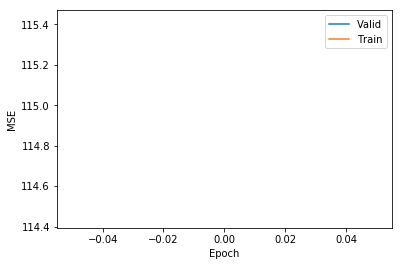

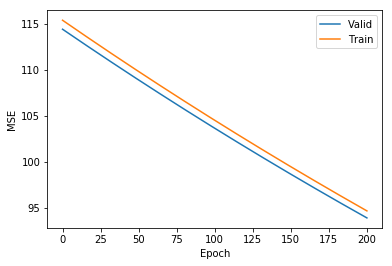

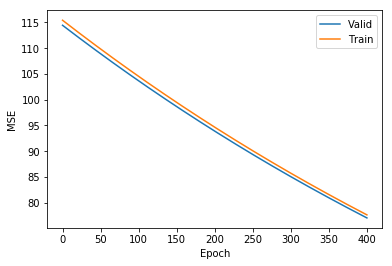

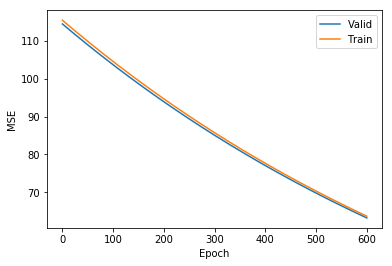

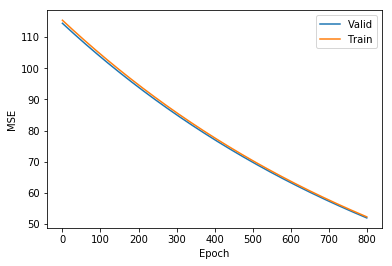

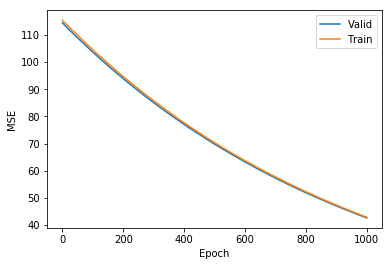

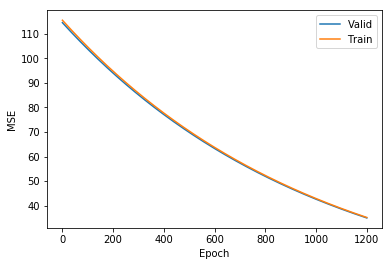

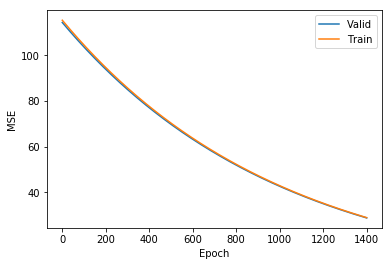

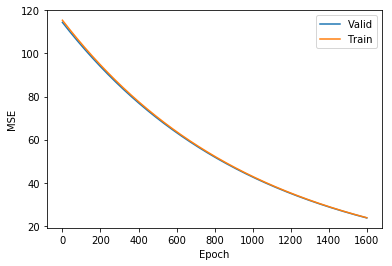

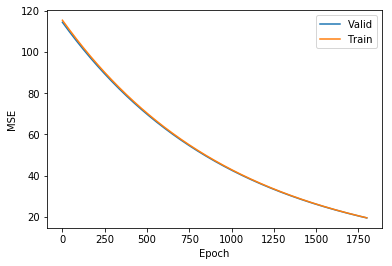

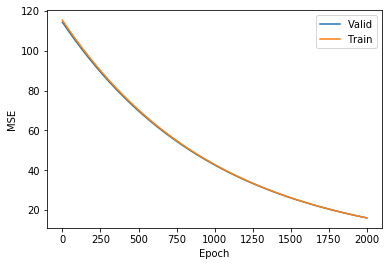

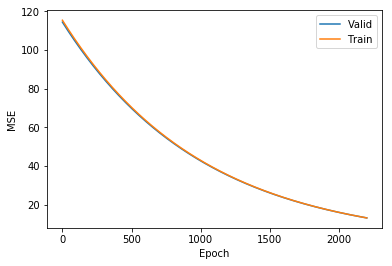

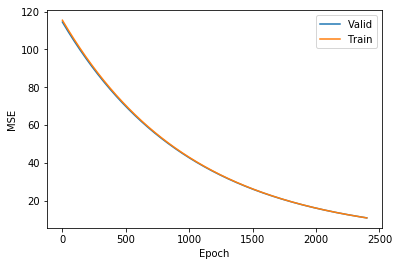

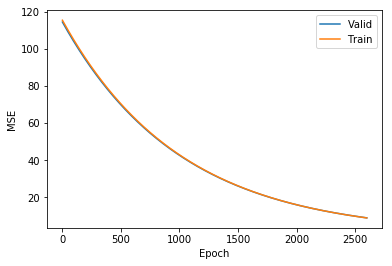

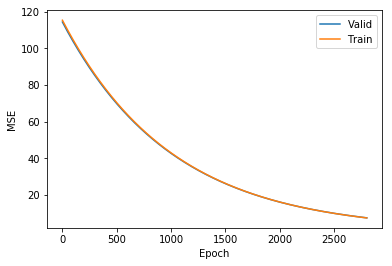

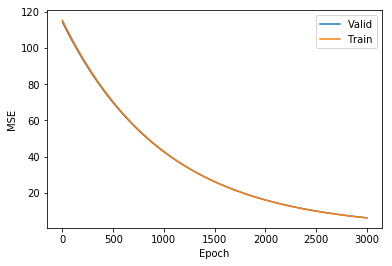

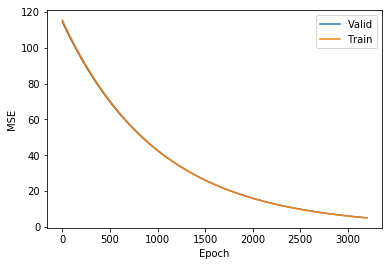

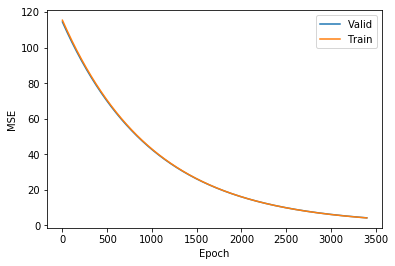

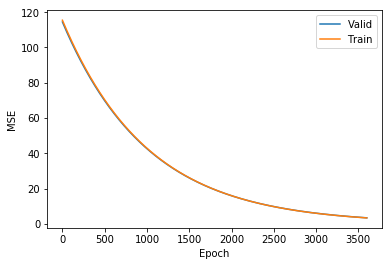

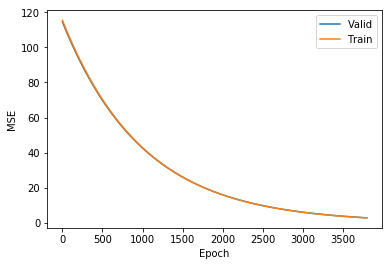

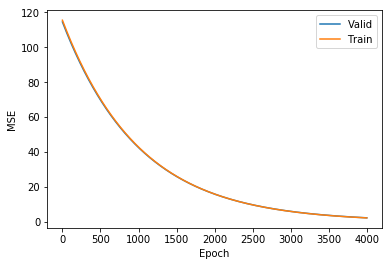

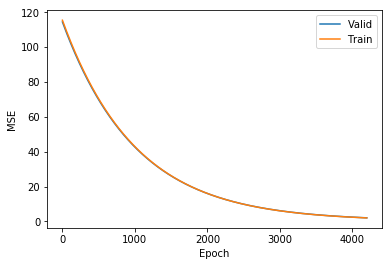

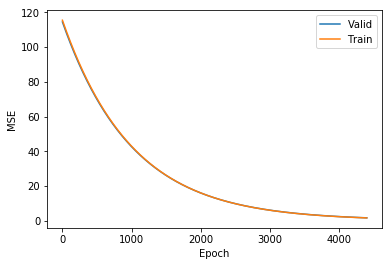

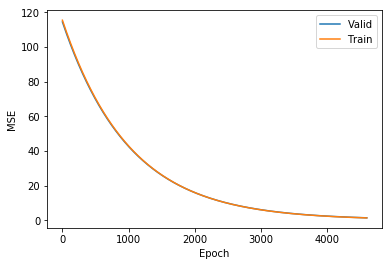

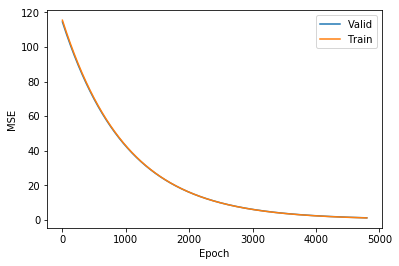

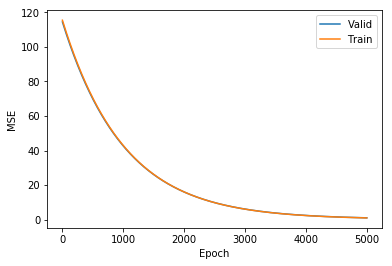

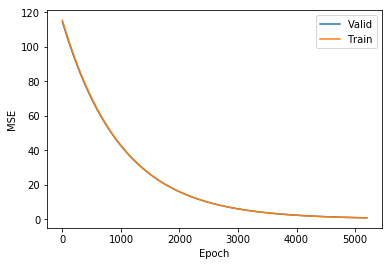

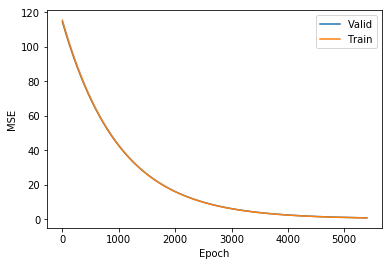

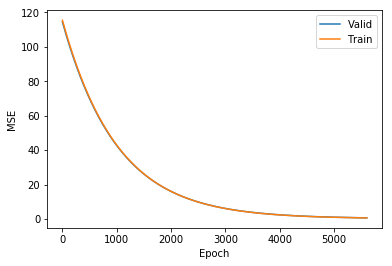

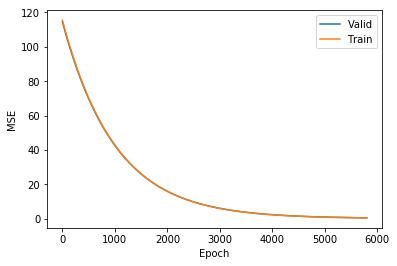

<Figure size 432x288 with 0 Axes>

In [11]:
s2 = stochastic_gradient_descent(6000,0.000001, False,True, False)

## Valid MSE for different step sizes

In [26]:
step_mseValid = {}
stepSizes = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1]

print ("Report validation performance (MSE) with different step sizes...")
for step in stepSizes:
    saturated_mseValid = stochastic_gradient_descent(6000,step,False,False,False)
    step_mseValid[step]= saturated_mseValid
    print ('Step size:',step, 'MSE Validation:', saturated_mseValid.get('mseValid'))

#Find the best step size with min MSE validation
best = min(step_mseValid.items(), key=lambda x: x[1].get('mseValid'))
print ("Best step size =",best[0], "with MSE Validation=", best[1].get('mseValid'))

Report validation performance (MSE) with different step sizes...
Step size: 1e-06 MSE Validation: 0.5337785111548642
Step size: 1e-05 MSE Validation: 0.08266852511718621
Step size: 0.0001 MSE Validation: 0.07407122718286417
Step size: 0.001 MSE Validation: 0.07408620191643103
Step size: 0.01 MSE Validation: 0.07413082872640482
Step size: 0.1 MSE Validation: 0.0729000511576526
Step size: 1 MSE Validation: 2.8334215572460404
Best step size = 0.1 with MSE Validation= 0.0729000511576526


## Test MSE of the chosen model

In [27]:
s = stochastic_gradient_descent(6000,0.01,False,False,False)
'''MSE Test for the chosen model (stepSize = 0.01)'''
print ('MSE Test for chosen model =',compute_linear_mse(s.get('w1'), s.get('w0'), test_data.get('x'), test_data.get('y')))


MSE Test for chosen model = 0.06957537878371503


## Visualizations at 5 epochs

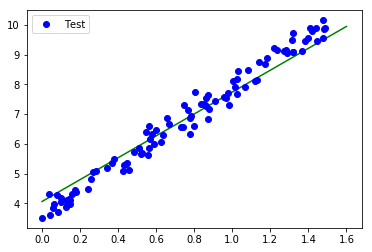

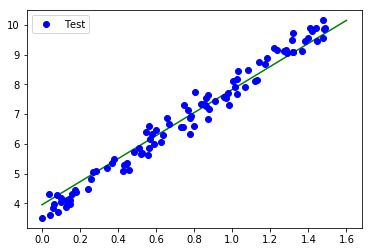

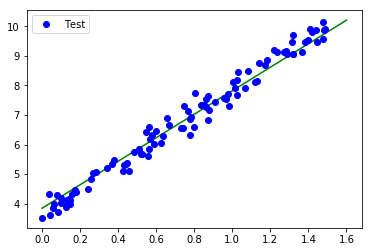

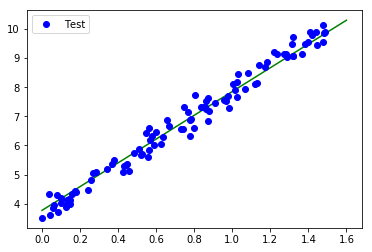

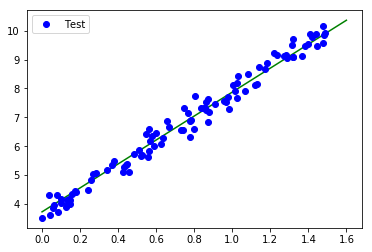

In [29]:
s3 = stochastic_gradient_descent(6000,0.01,False, False,True)